# Simon のアルゴリズム

　このセクションでは、最初にSimonの問題を紹介し、古典コンピューターと量子コンピューターのそれぞれでその問題を解く方法を紹介します。その後、Qiskitを用いて量子アルゴリズムを実装し、シミュレーターとデバイス上で実行してみます。


## Contents

1. [はじめに](#introduction)     
   1.1 [Simon の問題](#problem)    
   1.2 [Simon のアルゴリズム](#algorithm)
2. [例](#example)
3. [Qiskit による実装](#implementation)     
   3.1 [シミュレーター上での実行](#simulation)     
   3.2 [実機上での実行](#device)     
4. [量子オラクル](#oracle)
5. [演習](#problems)
6. [参考文献](#references)

## 1. はじめに <a id='introduction'></a>

　Simon のアルゴリズム[1]は、特定の問題を解く古典的なアルゴリズムに比べて指数関数的な高速化を実現した最初の量子アルゴリズムです。このアルゴリズムに触発され、量子フーリエ変換として知られている離散フーリエ変換の量子アルゴリズムが生まれました。これは最も有名な量子アルゴリズムである Shor の素因数分解アルゴリズムの内部で使われています。

### 1.1. Simon の問題 <a id='problem'> </a>

　まず、1対1対応のある関数、または2対1対応のある関数 $f$ を考えます。$f$ は以下のような特徴を持ちます:

- _1対1対応_: 全ての出力値に対して唯一の入力値が対応する。例えば $f(1) \rightarrow 1$, $f(2) \rightarrow 2$, $f(3) \rightarrow 3$, $f(4) \rightarrow 4$. 
- _2対1対応_: 全ての出力値に対して、必ず２つの入力値が対応する。例えば $f(1) \rightarrow 1$, $f(2) \rightarrow 2$, $f(3) \rightarrow 1$, $f(4) \rightarrow 2$, ここで秘密ビット列 $s$ があり、
$$
\quad f(x_1) = f(x_2)  \textrm{が成り立つような} x_1, x_2  \textrm{が与えられたとき、} \quad x_1 \oplus x_2 = s \textrm{が必ず成り立つ。}
$$


　与えられたブラックボックス関数 $f$ が、1対1対応関数なのか2対1対応関数なのか、どうしたら高速に判定できるでしょうか? さらにもし $f$ が2対1対応関数の場合、どうしたら高速に $s$ を特定できるでしょうか? これらは 秘密ビット列 $s$ を特定する問題に帰着されます。なぜなら $s={000...}$ の場合は $f$ は 1対1対応関数とわかるためです。


### 1.2. Simon のアルゴリズム <a id='algorithm'> </a>

#### 古典的な解法

　与えられた関数$f$に対して隠れ値$s$が全ての入出力に対して矛盾がないことを確認するためには、最大で$ 2^{N−1}+1 $ 個の入力値を確認しなければなりません。ここで $N$ は入力値のビット数です。つまり、同じ出力値に対して２つの入力値を見つけるまで、可能な全ての入力値の半分を確認することを意味しています。Deutsch-Jozsaの問題と同様に、運が良ければ最初の2回の試行だけでこの問題は解決します。しかしもし$f$が1対1対応関数だった場合や、2対1対応関数を最も不幸な順で確認した場合に、 $ 2^{N−1}+1$ 回の確認が必要となります。古典コンピューター上で、回数の下限が $ \Omega(2^{N/2}) $ となるアルゴリズム[2]が知られていますが、やはり必要な確認回数は $ N $ に対して指数関数的に増加します。


#### 量子的な解法

　Simon のアルゴリズムを実装した量子回路が以下に示します。

<!-- ![image1](images/simon_steps.jpeg) -->
<img src="images/simon_steps_ext.jpeg" alt="images/simon_steps.jpeg" style="zoom:50%;" width="50%" />

ここで、問い合わせ関数 $ \text{Q}_f $ は、２つの量子レジスターとして働きます: 

 $$ \lvert x \rangle \lvert 0 \rangle \rightarrow \lvert x \rangle \lvert f(x) \rangle $$

---

　このアルゴリズムは以下のステップで実行されていきます。

<ol>

   <li> ２つの $n$ 量子ビットの入力レジスターはゼロに初期化します:

   $$\lvert \psi_1 \rangle = \lvert 0 \rangle^{\otimes n} \lvert 0 \rangle^{\otimes n} $$

   </li>

   <li> $ 1 $ 個目のレジスターにアダマール変換を適用します:

   $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle\lvert 0 \rangle^{\otimes n}  $$

   </li>

   <li> 問い合わせ関数 $\text{Q}_f$ を適用します: 

   $$ \lvert \psi_3 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^{n} } \lvert x \rangle \lvert f(x) \rangle  $$

   </li>

   <li> ２つ目の量子レジスタを測定します。ある値 $ f(x) $ が測定されたものとします。この問題の設定上、測定値 $ f(x) $ は、２つの入力 $ x $ と $ y = x \oplus s $ に対応します。したがって、$ 1 $ 個目のレジスターは以下のようになります:

   $$\lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert x \rangle + \lvert y \rangle \right)$$

   ここで、二個目のレジスタは測定されているため省略しました。<br/>

   </li>

   <li> $ 1 $ 個目のレジスターにアダマール変換を適用します:

   $$ \lvert \psi_5 \rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{z \in \{0,1\}^{n} } \left[  (-1)^{x \cdot z} + (-1)^{y \cdot z} \right]  \lvert z \rangle  $$

   </li>
    
   <li> $ 1 $ 個目のレジスターの測定は、以下の出力を与えます:
    

   $$ (-1)^{x \cdot z} = (-1)^{y \cdot z} $$


   つまり:

\begin{eqnarray}
   x \cdot z &=& y \cdot z \\
   x \cdot z &=& \left( x \oplus s \right) \cdot z \\
   x \cdot z &=& x \cdot z \oplus s \cdot z \\
   s \cdot z &=& 0 \text{ (mod 2)}
\end{eqnarray}

   $ s $ との内積が $ 0 $ となる文字列 $ z $ が測定されます。すなわち、このアルゴリズムをおよそ$ n $ 回計算することで、$ n $ 個の異なる $ z $ を得ます。そして、以下のような連立方程式を考えます:

$$
   \begin{cases} s \cdot z_1 = 0 \\
   s \cdot z_2 = 0 \\
   \quad \vdots \\
   s \cdot z_n = 0 \end{cases}
$$

   この連立方程式を（例えばガウスの消去法などを使って）解くことによって、秘密ビット列$ s $ を特定することができます。

   </li>
</ol>

この問題に対しては、量子アルゴリズムは古典アルゴリズムに比べて指数関数的に少ない回数しか実行されません。繰り返しになりますが、このアルゴリズムの実用的な応用を考えるのは難しいです。しかしながら、このアルゴリズムは具体的な問題の解決を量子コンピューターを利用して指数関数的に高速化した最初の例となり、Shorのアルゴリズムの発見に寄与しました。


## 2. 例  <a id='example'></a>

Simon のアルゴリズムの実行例を、$ 2 $ 量子ビットで 秘密ビット列$ s=11 $ の場合について見ていきます。
もし $ y = x \oplus s $ ならば、$ f(x) = f(y) $ となるような関数が対象となります。
この問題を解く量子回路は以下のようになります:

<!-- ![image2](images/simon_example.jpeg) -->
<img src="images/simon_example.jpeg" alt="images/simon_steps.jpeg" style="zoom:50%;" width="50%" />



<ol>
   <li> ２つの $2$-量子ビットの入力レジスターはゼロで初期化されます:
   
   $$\lvert \psi_1 \rangle = \lvert 0 0 \rangle_1 \lvert 0 0 \rangle_2 $$

   </li>
    
   <li> $ 1 $ 個目のレジスターにアダマールゲートを適用します:
    
   $$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1 + \lvert 0 1 \rangle_1 + \lvert 1 0 \rangle_1 + \lvert 1 1 \rangle_1 \right) \lvert 0 0 \rangle_2 $$

   </li>
    
   <li> 秘密ビット列 $ s = 11 $ に対して、問い合わせ関数は $\text{Q}_f = CX_{13}CX_{14}CX_{23}CX_{24}$ と実装されます:
    \begin{aligned}
     \lvert \psi_3 \rangle  = \frac{1}{2} \left(\lvert 0 0 \rangle_1  \lvert 0\oplus 0 \oplus 0, 0 \oplus 0 \oplus 0 \rangle_2 \\
            + \lvert 0 1 \rangle_1 \lvert 0\oplus 0 \oplus 1, 0 \oplus 0 \oplus 1 \rangle_2 \\
            + \lvert 1 0 \rangle_1 \lvert 0\oplus 1 \oplus 0, 0 \oplus 1 \oplus 0 \rangle_2 \\
            + \lvert 1 1 \rangle_1 \lvert 0\oplus 1 \oplus 1, 0 \oplus 1 \oplus 1 \rangle_2 \right)
    \end{aligned}
    
したがって、

   $$ \lvert \psi_3 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle_1  \lvert 0 0 \rangle_2 + \lvert 0 1 \rangle_1 \lvert 1  1 \rangle_2 + \lvert 1 0 \rangle_1 \lvert  1   1  \rangle_2 + \lvert 1 1 \rangle_1 \lvert 0 0 \rangle_2 \right)  $$

となります。
   </li>
   
   <li> ここで、$ 2 $ 個目のレジスターを測定します。$ 50\% $ の確率で $\lvert  0   0  \rangle_2$ または $\lvert  1   1  \rangle_2$ が測定されます。ここでは $\lvert  1   1  \rangle_2$ が測定されたものと仮定します。状態ベクトルは以下のようになります：

   $$ \lvert \psi_4 \rangle = \frac{1}{\sqrt{2}}  \left( \lvert  0   1  \rangle_1 + \lvert  1   0  \rangle_1 \right)  $$

ここで、$ 2 $ 個目のレジスターは測定されているため省略して表記しました。

   </li>
    
   <li> $ 1 $ 個目のレジスターにアダーマール変換を適用します。
\begin{eqnarray}
       \lvert \psi_5 \rangle &=& \frac{1}{2\sqrt{2}} \left[ \left( \lvert 0 \rangle + \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right) + \left( \lvert 0 \rangle - \lvert 1 \rangle \right) \otimes \left( \lvert 0 \rangle + \lvert 1 \rangle \right)  \right] \\
    &=&  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle - \lvert 0 1 \rangle + \lvert 1 0 \rangle - \lvert 1 1 \rangle   + \lvert 0 0 \rangle + \lvert 0 1 \rangle - \lvert 1 0 \rangle - \lvert 1 1 \rangle \right] \\
    &=& \frac{1}{\sqrt{2}} \left( \lvert 0 0 \rangle - \lvert 1 1 \rangle \right)
\end{eqnarray}

    
   </li>
    
   <li> $ 1 $ 個目のレジスターを測定すれば、$\lvert 0, 0 \rangle$ または $\lvert 1, 1 \rangle$ を得ます。ここでは $\lvert 1, 1 \rangle$ を測定したものと仮定します。

   $$ s \cdot 11 = 0 $$
   
   方程式が一つ得られました。しかし、$ s $ は $ 2 $ ビットなので、もう一種類の方程式が得られるまで何回かアルゴリズムを実施する必要があります。十分な数の方程式が得られたら、連立方程式を解くことで $ s $ を求めることができます。
   </li>
</ol>

## 3. Qiskit による実装 <a id='implementation'></a>

 $2$-量子ビット、秘密ビット列 $ s=11 $ の上記の [例](example) を解く Simon のアルゴリズムを qiskit で実装します。

In [2]:
#initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
s = '11'

Qiskit では、測定は量子回路の最後で行います。そのため、このSimon のアルゴリズムでは、$ 2 $ 個目のレジスターの測定を最後に移動させます。


In [5]:
# Creating registers
# qubits and classical bits for querying the oracle and finding the hidden period s
n = 2*len(str(s))
simonCircuit = QuantumCircuit(n)
barriers = True

# Apply Hadamard gates before querying the oracle
simonCircuit.h(range(len(str(s))))    
    
# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply the query function
## 2-qubit oracle for s = 11
simonCircuit.cx(0, len(str(s)) + 0)
simonCircuit.cx(0, len(str(s)) + 1)
simonCircuit.cx(1, len(str(s)) + 0)
simonCircuit.cx(1, len(str(s)) + 1)  

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply Hadamard gates to the input register
simonCircuit.h(range(len(str(s))))

# Measure ancilla qubits
simonCircuit.measure_all()

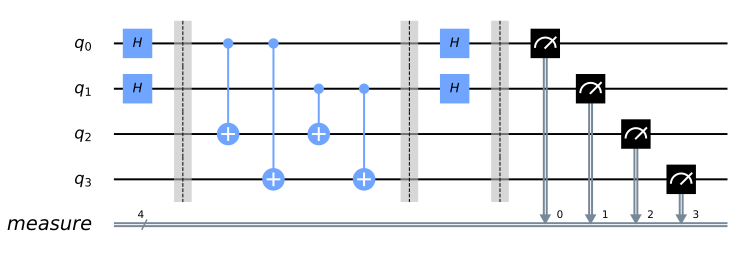

In [6]:
simonCircuit.draw(output='mpl')

### 3.1 シミュレーター上での実行  <a id='simulation'></a>

シミューレーターを用いて上記の回路を実行します。

{'00': 512, '11': 512}


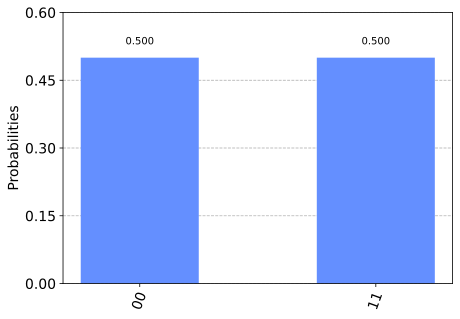

In [7]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [8]:
# Calculate the dot product of the results
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


これらの結果を利用して、秘密ビット列 $s = 11$ を特定できます。

### 3.2 実機上での実行  <a id='device'></a>

　実機を用いて上記の回路を実行します。

In [12]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
token='070fd944ad7c95de345a68b77e17f723879cefb2467524f586a2f131ec6eb879bdd48b860678bed3314db13aabe54e491a7a98660b4c7e70acd9c0db93f90967'
IBMQ.save_account(token)

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [13]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(simonCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


{'00': 512, '11': 512}


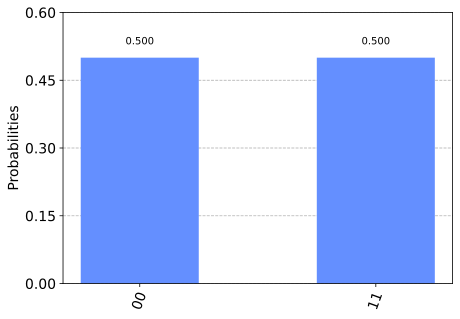

In [15]:
# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [16]:
# Calculate the dot product of the most significant results
print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    if answer_plot[z_rev] >= 0.1*shots:
        z = z_rev[::-1]
        print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 00, 11.00=0
11, 11, 11.11=0


ここで、最も重要な結果は $ s \cdot z = 0$ (mod 2) です。この情報と古典コンピューターを利用して連立方程式を解くことで、秘密ビット列 $ s = 11$ を得ることができます。

## 4. 量子オラクル <a id='oracle'></a>

　上のSimonのアルゴリズムの[例](#example)と[実装](#implementation) は、秘密ビット列 $ s = 11 $ だけに特化しています。このアルゴリズムを任意の秘密ビット列に対応するように拡張するには、問い合わせ関数についてより詳細に考察する必要があります。

　Simon のアルゴリズムは秘密ビット列 $s \in \{0,1\}^n$ を、全ての$x \in \{0,1\}^n$ と対応する $y = x \oplus s$ に対して  $f_s(x) = f_s(y) $ が成り立つようなオラクル $ f_s $ から探し出します。ここで、$\oplus$ はビットごとの XOR 演算子です。したがって、もし $s = 0\ldots 0$ (全てのビットが $0$) ならば、$f_s$ は 1対1対応関数であることがわかる。もし $s \neq 0\ldots 0$ ならば、$f_s$ は 2対1対応関数である。

　このアルゴリズムでは、オラクルは $|x\rangle|0\rangle$ を入力として受け取る。事前に定められた $s$ のもと、全ての $x \in \{0,1\}^n$ に対して $f(x) = f(x\oplus s)$ となるようにオラクルは2つめの量子レジスタに書き込み、入力を$|x\rangle|f_s(x)\rangle$ に変換する。

　このようなブラックボックス関数は、以下のような手順で実現されます。

- 1個目のレジスタの内容を2個目のレジスタにコピーする。
$$
|x\rangle|0\rangle \rightarrow |x\rangle|x\rangle
$$

-  **(1対1 または 2対1 写像を作る)** もし $ s $ が $ 0 $ でない場合, $ j $ ビットめの値が $s_j = 1$ となる最も小さなインデックス $ j $ が存在する。もし $x_j = 0$ ならば、$2$個目のレジスターを $ s $ に関して XOR を適用する。そうでなければ、何もしない。
$$
|x\rangle|x\rangle \rightarrow |x\rangle|x \oplus s\rangle~\mbox{if}~x_j = 0~\mbox{for the least index j}
$$

-  **(ランダムな置換を行う)** $2$個目のレジスターの量子ビットをランダムに置換する。
$$
|x\rangle|y\rangle \rightarrow |x\rangle|f_s(y)\rangle
$$


## 5. 演習 <a id='problems'></a>

1. 一般の Simon の量子オラクルを実装して下さい。
2. シミュレーターまたは実機上で実装した Simon の量子オラクルに対して、秘密ビット列 $s=1001$ をテストして下さい。結果が想定通りだったか確認して下さい。

## 6. 参考文献 <a id='references'></a>

1. Daniel R. Simon (1997) "On the Power of Quantum Computation" SIAM Journal on Computing, 26(5), 1474–1483, [doi:10.1137/S0097539796298637](https://doi.org/10.1137/S0097539796298637)
2. Guangya Cai and Daowen Qiu. Optimal separation in exact query complexities for Simon's problem. Journal of Computer and System Sciences 97: 83-93, 2018, [https://doi.org/10.1016/j.jcss.2018.05.001](https://doi.org/10.1016/j.jcss.2018.05.001)

In [11]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.1',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.2'}